## Sobel Edge Detector
***

Agora  que  aprendemos  a  calcular  gradientes  manualmente,  vejamos  como  podemos aproximá-los usando kernels, o que nos dará um enorme impulso de velocidade. Assim como usamos os kernels para suavizar e desfocar uma imagem, também podemos usar os kernels para calcular nossos gradientes. Começaremos com o método Sobel, que realmente usa dois kernels: um para detectar mudanças horizontais na direção e outro para detectar mudanças verticais na direção.

A  ideia  por  trás  do  detector  de  borda  Sobel  é  encontrar  os  pixels  com  uma  grande magnitude de valores de gradiente. Agora não estamos apenas interessados na mudança, mas também a magnitude da mudança (que também é o gradiente). A magnitude do gradiente é calculada encontrando a raiz quadrada da soma dos quadrados da imagem derivada na direção x e a derivada na direção y. A equação para o gradiente é a seguinte:

![img](https://user-images.githubusercontent.com/14116020/64580622-53a12600-d35d-11e9-9c86-61da2856a743.png)

Para  determinar  quão  grandes  valores  devem  ser  considerados,  estabelecemos  um limite. Então, depois de encontrar o gradiente, tomamos todos os valores de gradiente, que excedem esse limite específico.

Em  geral,  a  magnitude  e  a  orientação  do  gradiente  fazem  excelentes  recursos  e descritores de imagem ao quantificar e representar de forma abstrata uma imagem. Mas para a detecção  de  bordas,  a  representação  de  gradiente  é  extremamente  sensível  ao  ruído  local. Precisamos  adicionar  mais  algumas  etapas  para  criar  um detector  de  borda  robusto  e estaremos cobrindo essas etapas detalhadamente quando estudarmos o Canny Edge Detector.

***

In [1]:
from matplotlib import pyplot as plt
import cv2

def show(img):
    """
    Redimensionar a imagem e mostrar no codigo.
    """

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.rcParams['figure.figsize'] = (50, 50)
    plt.imshow(img)
    plt.axis("off")
    plt.show()

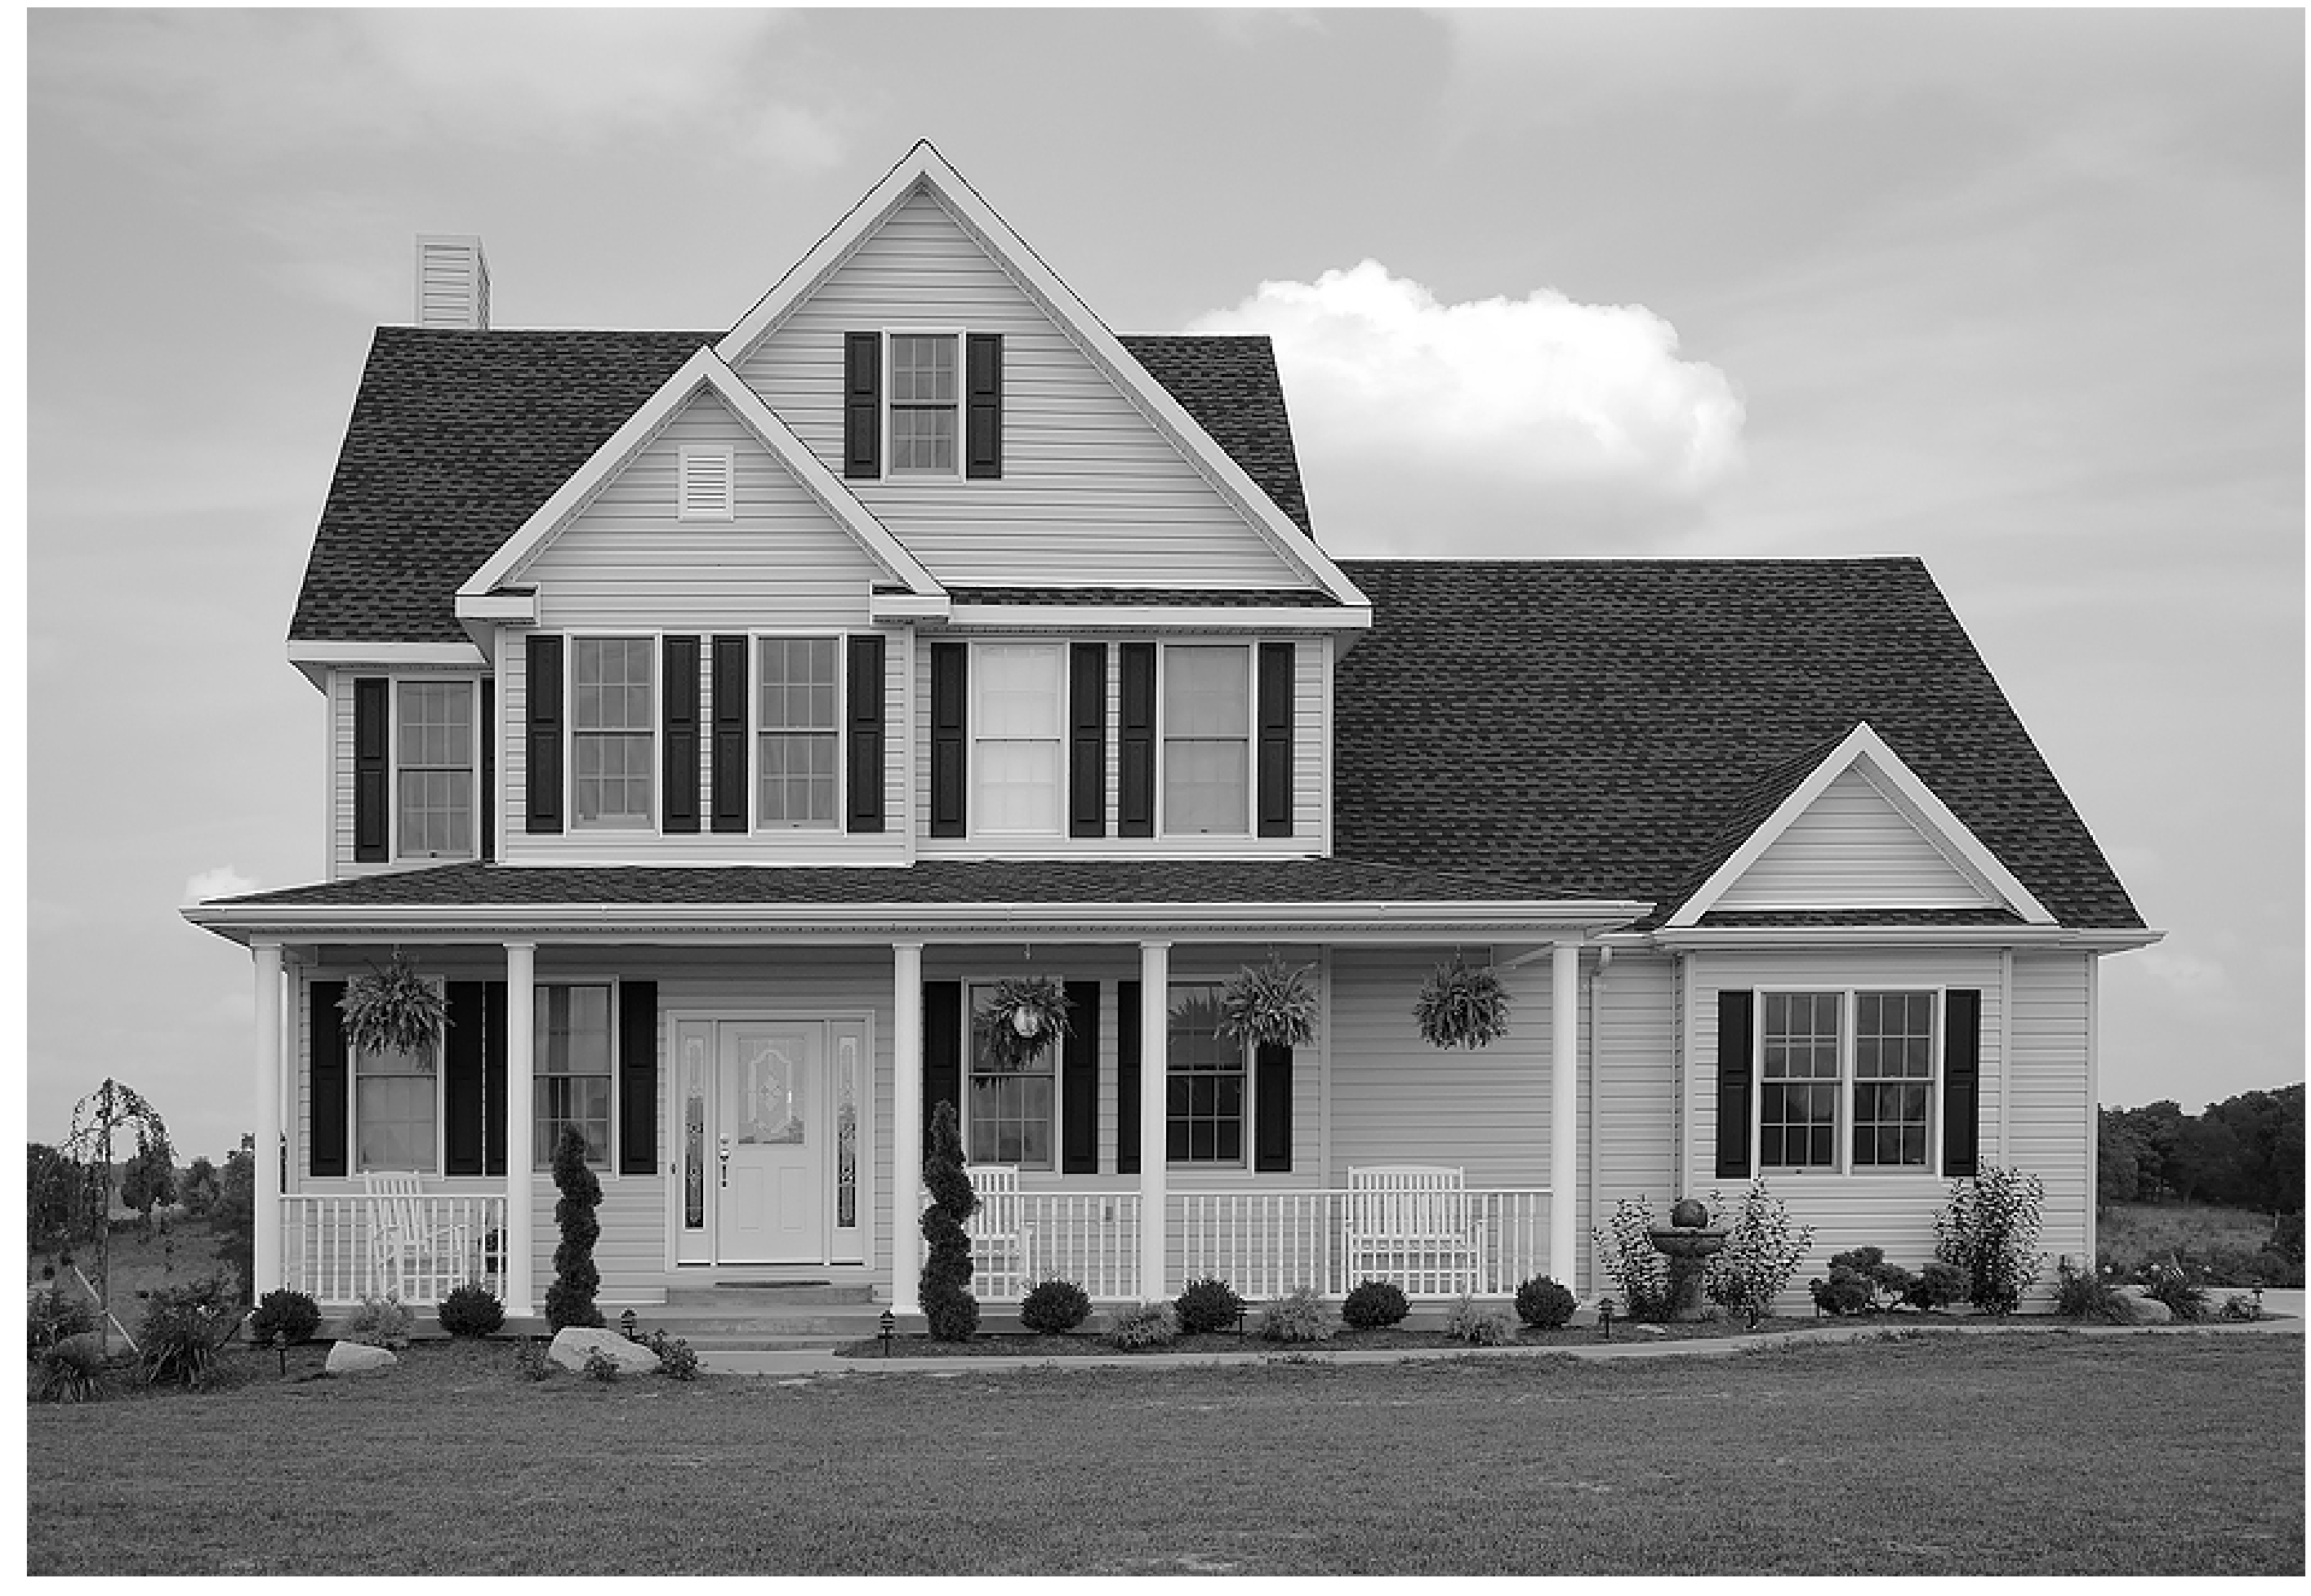

In [2]:
# Carregando a imagem e convertendo para escala de cinza
image = cv2.imread("imagens/casa.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
show(gray)

In [3]:
# Computando os gradientes nos eixos X e Y 
gX = cv2.Sobel(gray, ddepth=cv2.CV_64F, dx=1, dy=0)
gY = cv2.Sobel(gray, ddepth=cv2.CV_64F, dx=0, dy=1)

In [4]:
# As imagens gX e gY são agora do tipo de dados de ponto flutuante,
# então precisamos convertê-las de volta para uma representação não-assinada de 8 bits
# de inteiro para que outras funções OpenCV possam utilizá-las
gX = cv2.convertScaleAbs(gX)
gY = cv2.convertScaleAbs(gY)

In [5]:
# Combina as representações sobel X e Y em uma única imagem
sobelCombined = cv2.addWeighted(gX, 0.5, gY, 0.5, 0)

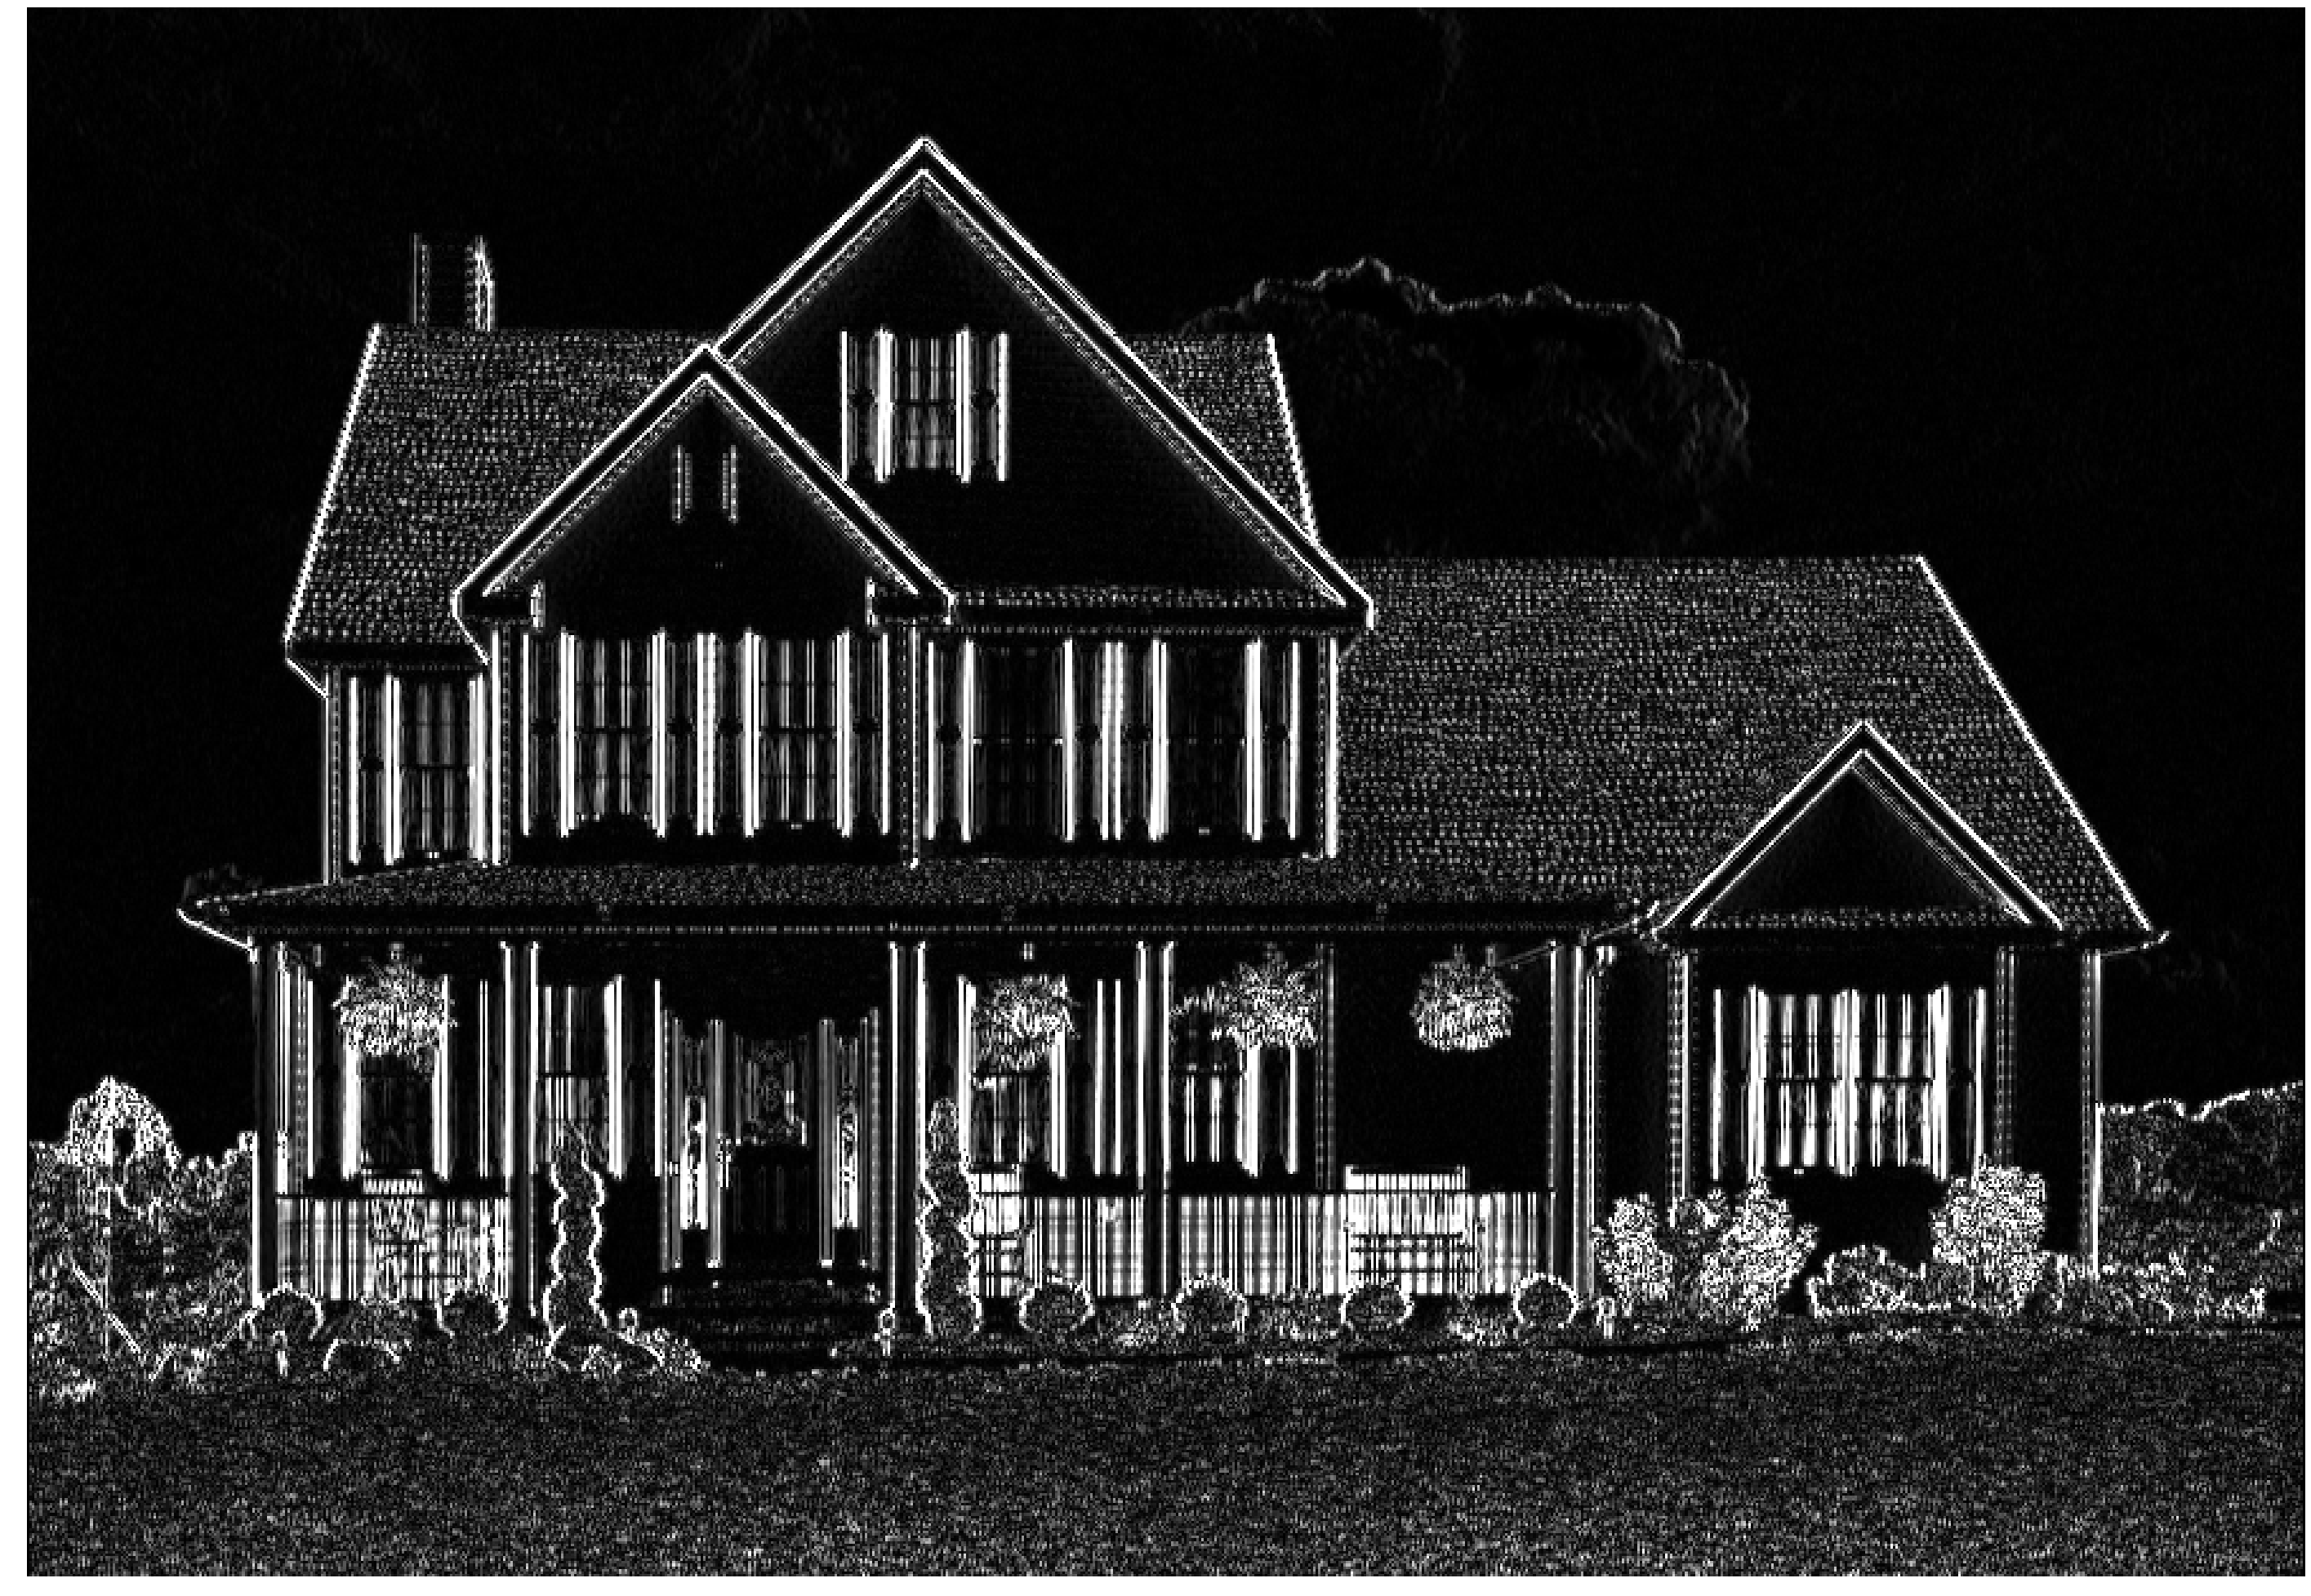

In [6]:
show(gX)

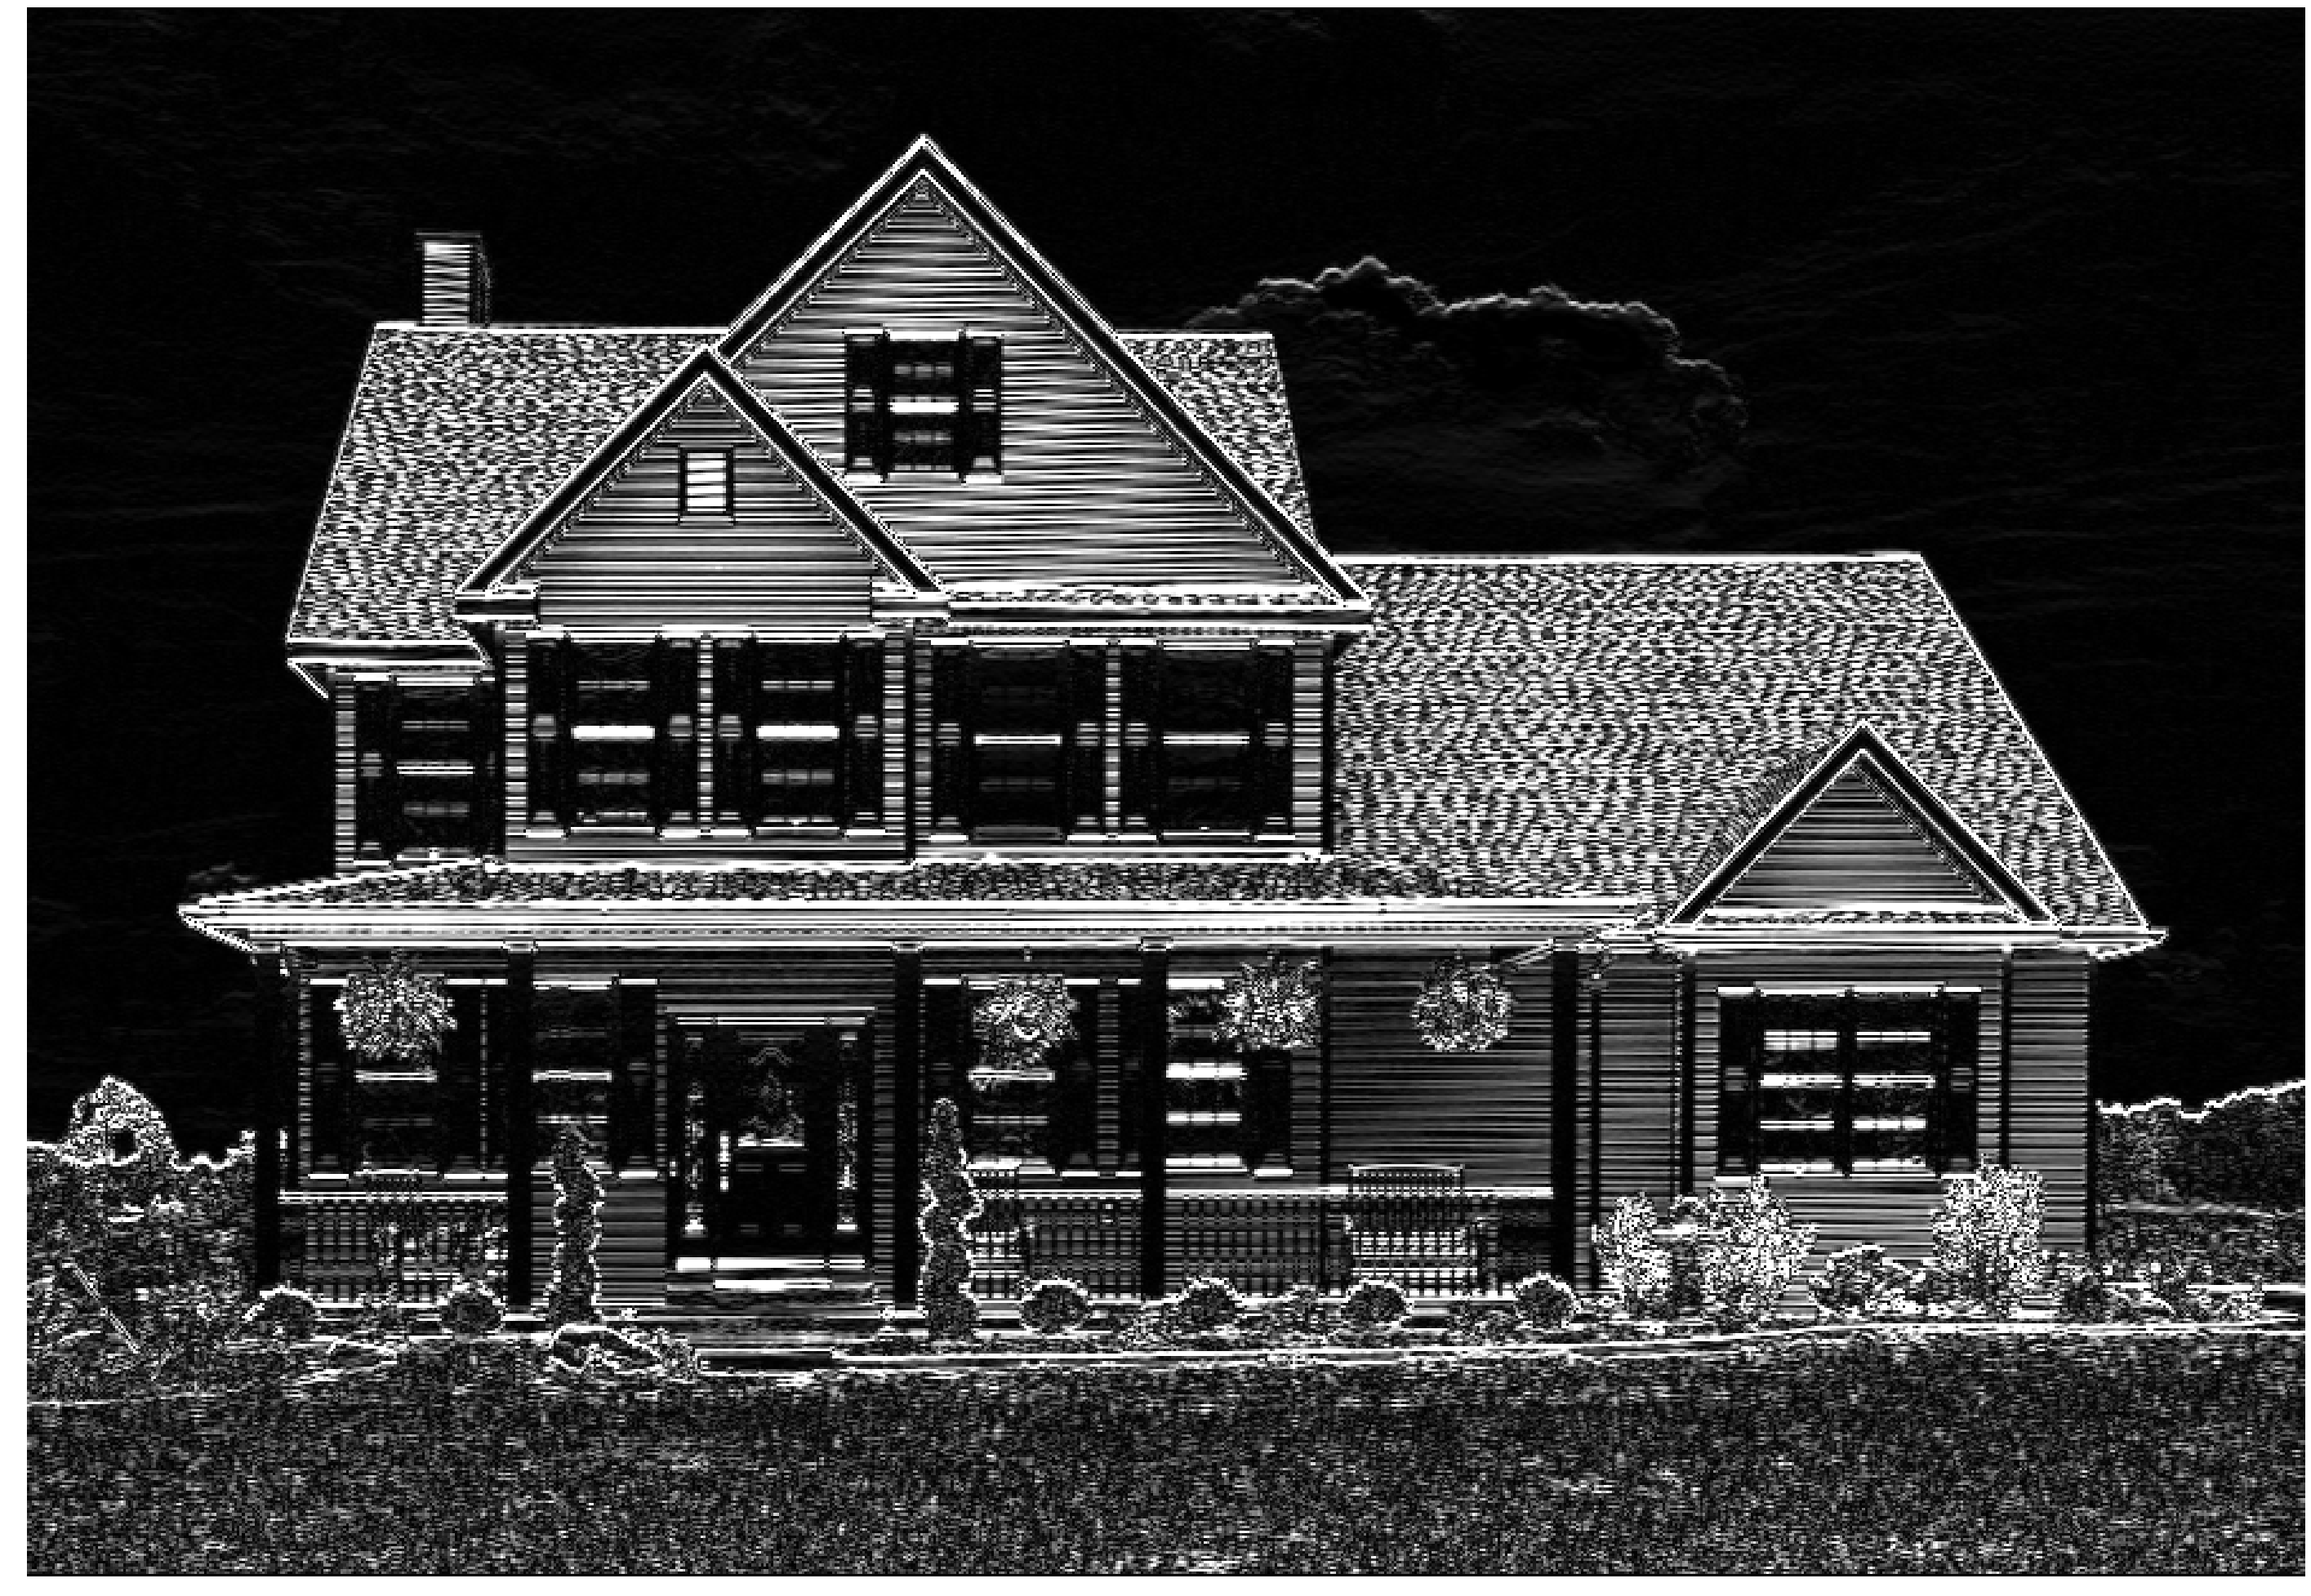

In [7]:
show(gY)

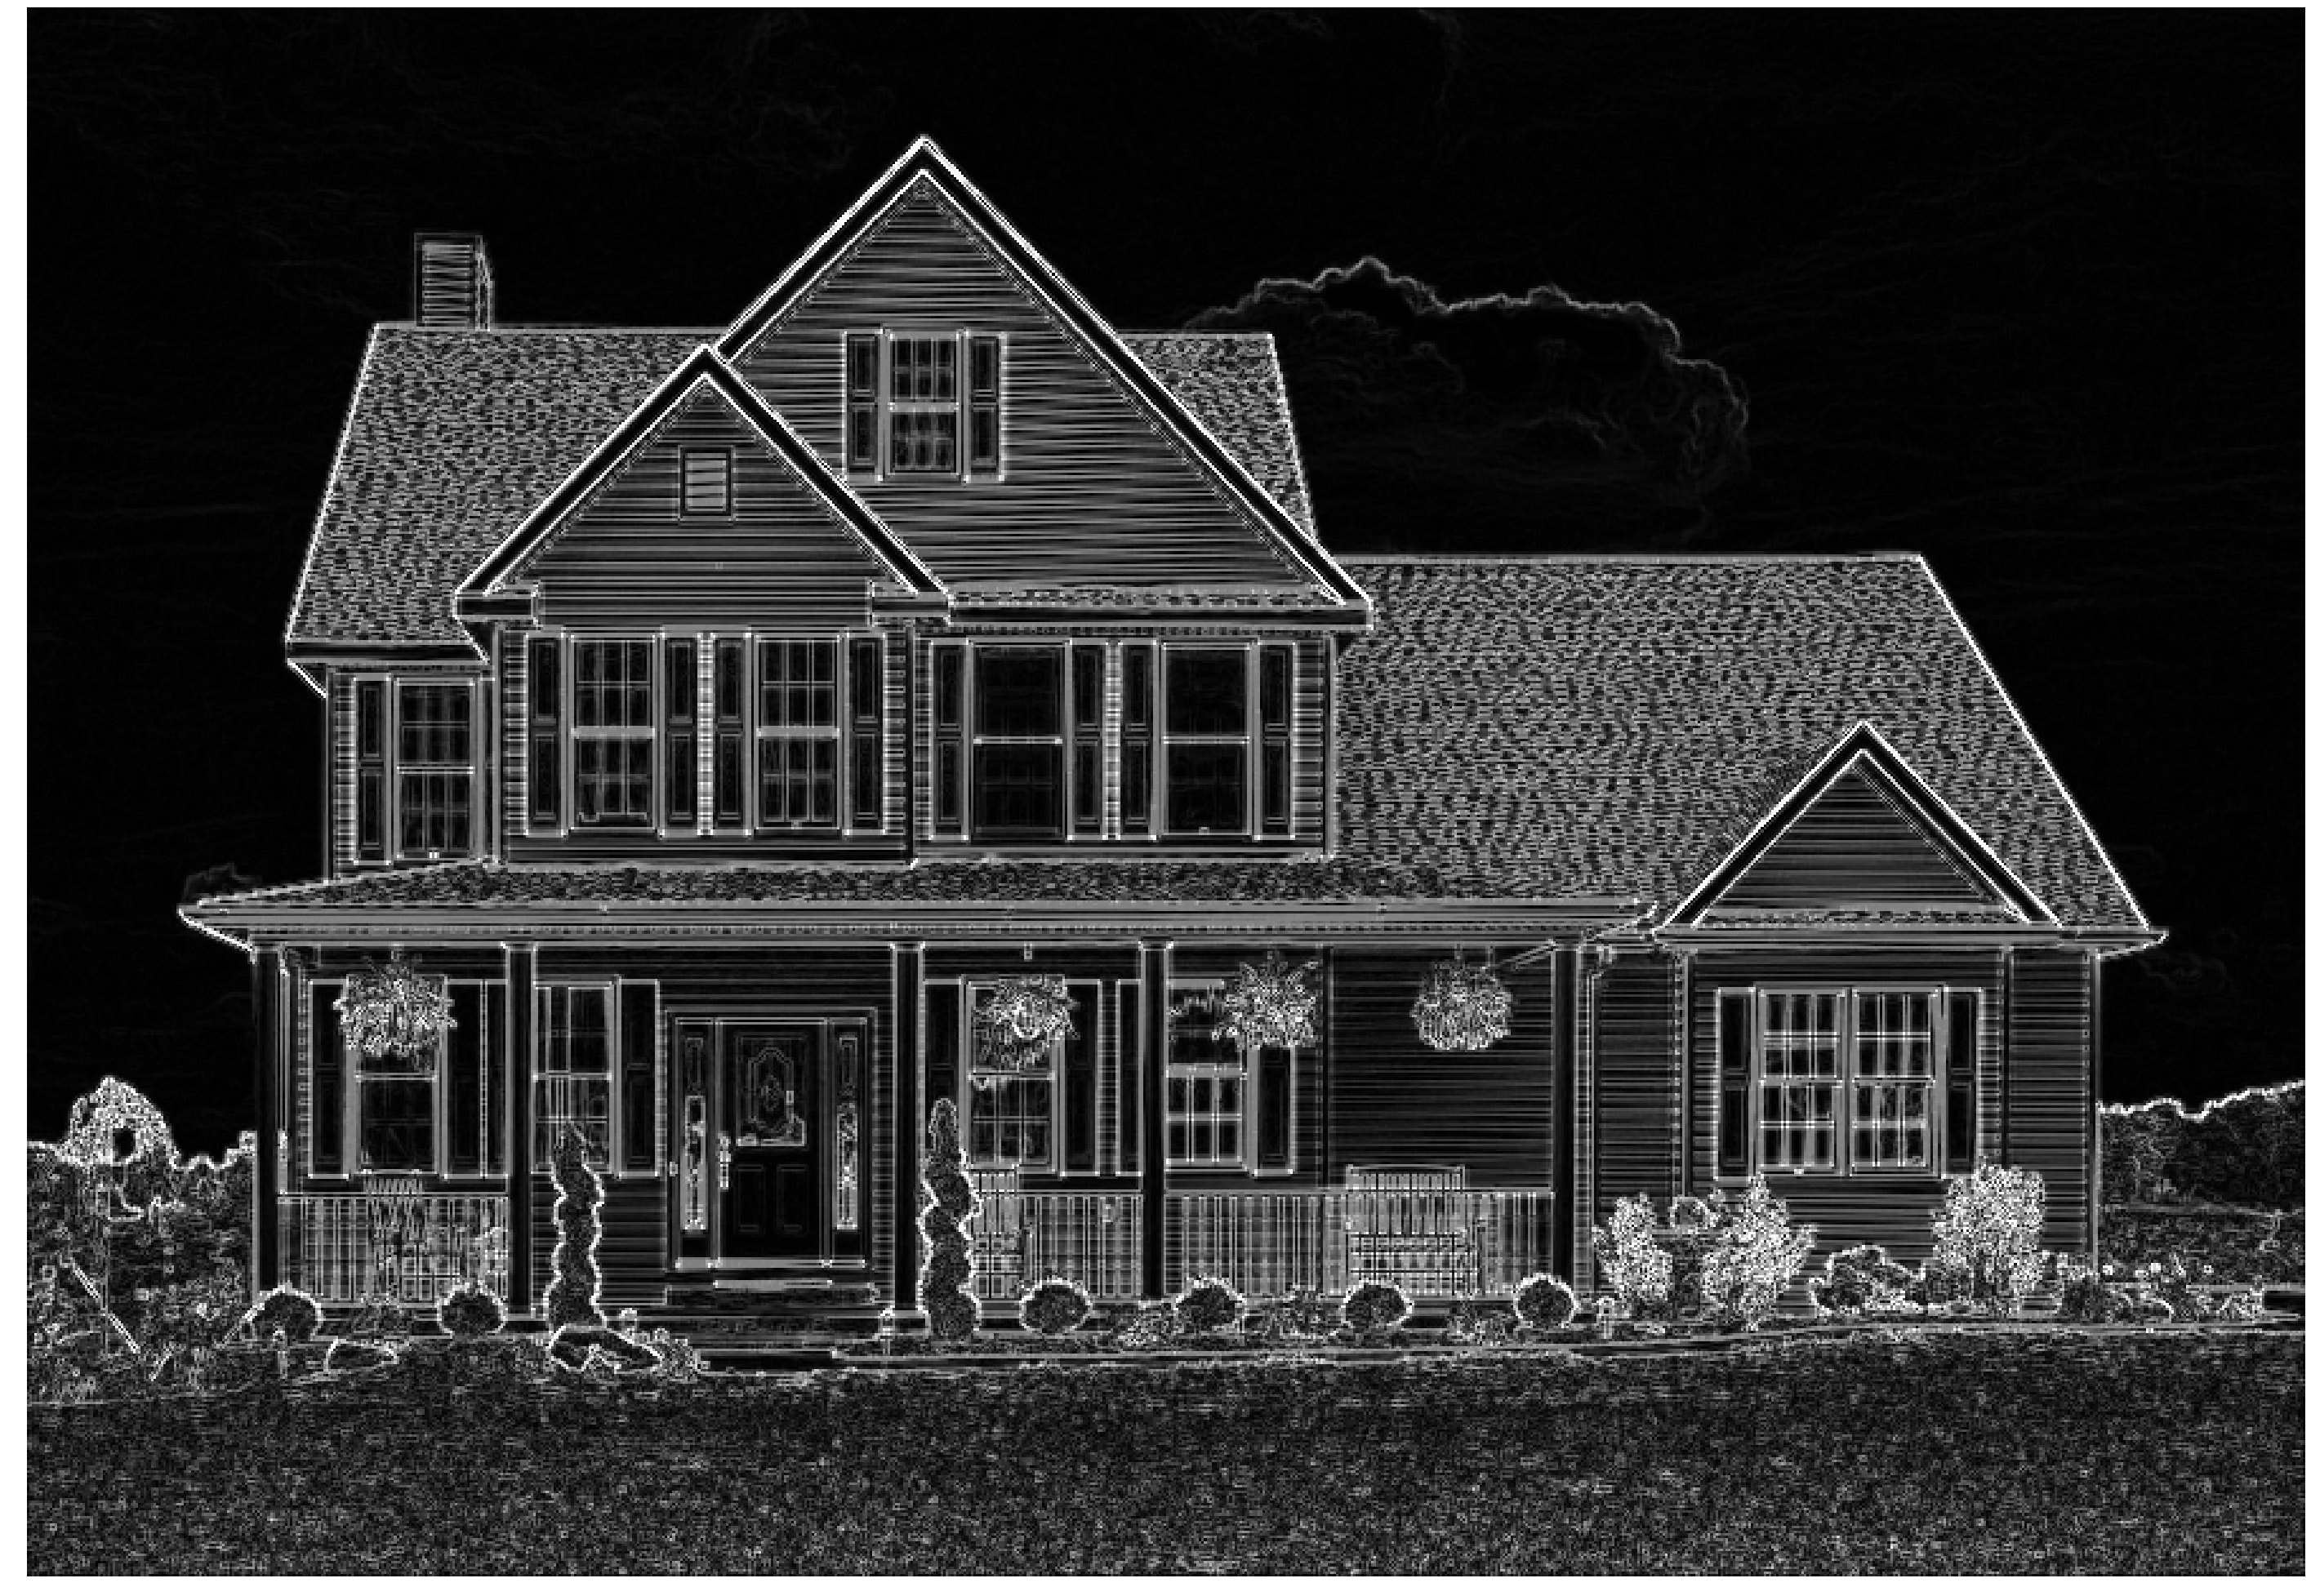

In [8]:
show(sobelCombined)